In [1]:
#Importing Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical 
from keras.optimizers import Adam
import os


Using TensorFlow backend.
d:\mltensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\mltensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\mltensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\mltensor\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
# Loading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

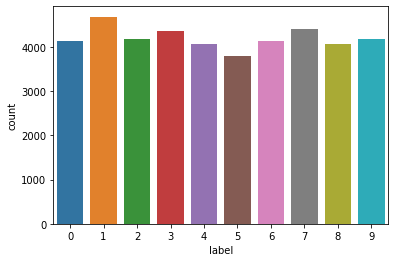

In [3]:
Y_train = train_data['label']
sns.countplot(Y_train)

In [4]:
X_train = train_data.drop('label',axis = 1)

In [5]:
del train_data

In [6]:
# Checking for Null-values in Training Data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# Checking for Null-values in Training Data
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
# Normalisation of Training and Test data
X_train = X_train/255.0
test_data = test_data/255.0

In [9]:
# Reshaping training and test data
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [11]:
# Checking shape of training data
X_train.shape

(42000, 28, 28, 1)

In [12]:
# Checking shape of test data
test_data.shape

(28000, 28, 28, 1)

In [13]:
# One hot encoding categorical labels
Y_train = to_categorical(Y_train,num_classes = 10)

In [14]:
# Spliting training and testing data
random_seed = 42
X_train,test_X,Y_train,test_Y = train_test_split(X_train,Y_train,test_size = 0.1,random_state = random_seed)

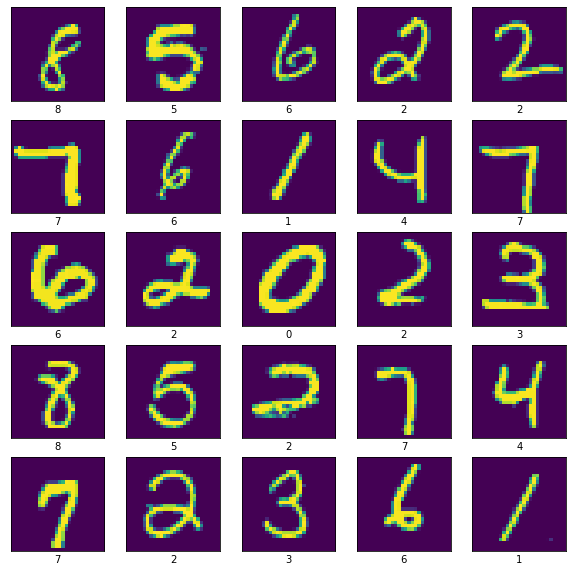

In [29]:
# Plotting some images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i][:,:,0])
    plt.xlabel(list(Y_train[i]).index(1))
plt.show()

In [34]:
# Creating different layers

model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (5,5),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(Conv2D(filters = 32,kernel_size = (5,5),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

W0824 20:44:48.229425  7056 deprecation.py:506] From d:\mltensor\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
# Compiling different layers
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
model.fit(x = X_train,y = Y_train,batch_size = 128,epochs = 50,validation_data=(test_X,test_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 7s 198us/step - loss: 0.2806 - acc: 0.9090 - val_loss: 0.0692 - val_acc: 0.9798
Epoch 2/50
37800/37800 [==============================] - 6s 171us/step - loss: 0.0808 - acc: 0.9748 - val_loss: 0.0376 - val_acc: 0.9888
Epoch 3/50
37800/37800 [==============================] - 6s 171us/step - loss: 0.0615 - acc: 0.9812 - val_loss: 0.0345 - val_acc: 0.9893
Epoch 4/50
37800/37800 [==============================] - 7s 172us/step - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0282 - val_acc: 0.9912
Epoch 5/50
37800/37800 [==============================] - 7s 173us/step - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0286 - val_acc: 0.9910
Epoch 6/50
37800/37800 [==============================] - 7s 173us/step - loss: 0.0352 - acc: 0.9894 - val_loss: 0.0258 - val_acc: 0.9931
Epoch 7/50
37800/37800 [==============================] - 7s 174us/step - loss: 0.0311 - acc: 0.9904 - val_loss: 0.0371 - v

In [37]:
result = model.predict(test_data)

In [38]:
results = np.argmax(result,axis = 1)

In [39]:
Label = pd.Series(results,name = 'Label')
ImageId = pd.Series(range(1,28001),name = 'ImageId')
submission = pd.concat([ImageId,Label],axis = 1)
submission.to_csv('submission.csv',index = False)